Here are the main steps to follow:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine tune the model.
7. Present the solution.
8. Launch, monitor, and maintain your system.

# Working with real data.

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains.

Populat open data repositories:
- UC Irvine Machine Learning Repository.
- Kaggle datasets.
- Amazon's AWS datasets.
- dataportals.org.
- opendatamonitor.eu.
- quandl.com
- Wikipedia's list of Machine Learning datasets
- Quora.com question
- Datasets subreddit

In this chapter we chose the California Housing Prices ddataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent

In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz" 

2021-08-18 18:41:03.119221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-18 18:41:03.119247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Each row represents one district. There are 10 attributes: ```longitude, latitute, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity```

The ```info()``` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute's type and number of non-null values.

There are 20640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it is good to get started. Notice that the ```total_bedrooms``` attribute has only 20433 non-null values, meaning that 207 districs are missing this feature. We will need to take care of this later.

All attributes are numerical, except the ```ocean_proximity``` field. Its type is ```object```, so it could hold any kind of Python object, but since the data is loaded from a CSV file, it is probably a text attribute. When looked at the top five rows, the values in that columns are repetitive, which means that is probably a categorical attribute.

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The ```count, mean, min, max``` are self-explanatory. Note that the null values are ignored (so, for example, count of ```total_bedroms``` is 20433 not 20640). The ```std``` row shows the standard deviation (which measures how dispersed the values are). The 25%, 50% and 75% rows shows the corresponding ***percentiles***: a percentile indicates tthe value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a ```housing_median_age``` lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the ```hist()``` method on the whole dataset, and it will plot a histogram for each numerical attribute. For example, you can see that slightly over 800 districts have a ```median_house_value``` equal to about 500,000 USD.

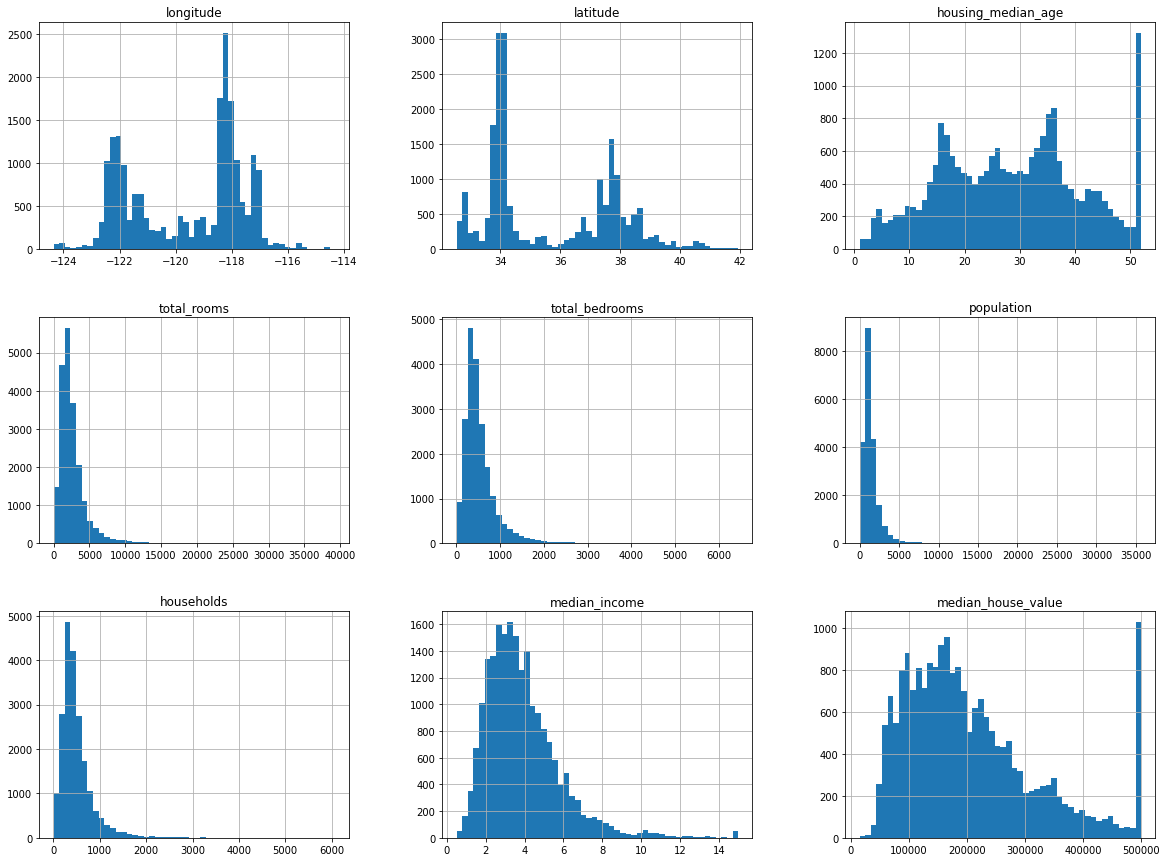

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Notice few things in these histograms:

1. First, the median income attribute does not look like it its expressed in US dollars. After checking, the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.49999) for lower median incomes. Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how data was computed.
2. The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute (label). Your machine learning algorithms may learn that prices never go beyond that limit. You need to check with your team (that they will use your system's output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000, then there are two options:
    a. Collect proper labels for the districts whose labels were capped.
    b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond 500,000).
3. These attributes have very different scales.
4. Finally, many histograms are ***tail heavy***: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

Create a test set:

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use. This is true, but your brain amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estime will be too optimistic and you will launch a system that will nott perform as well as expected. This is called *data snooping bias*. Creating  a test set is theretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside.

In [11]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [12]:
housing['income_cat'].value_counts() / len(housing) # this corresponds to the chance of being picked on each minibatch

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

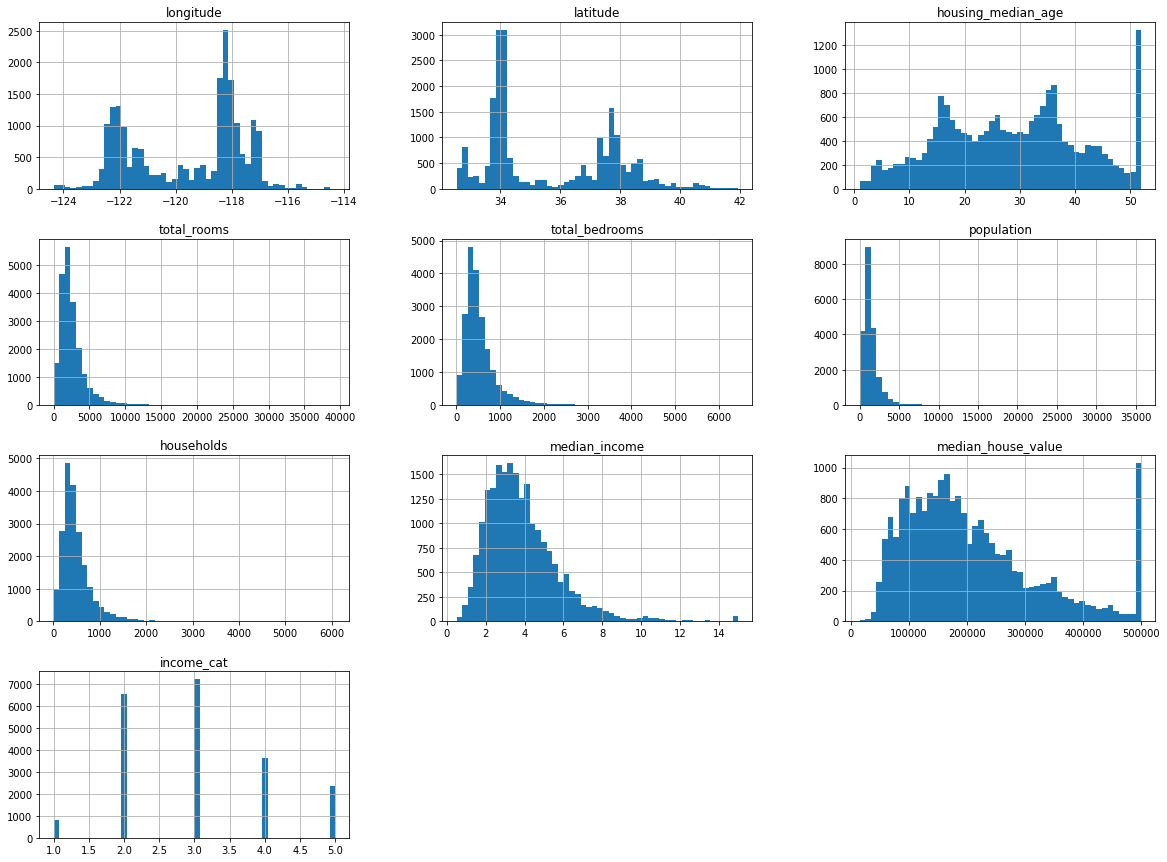

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


# Discover and Visualize the Data to gain insights

So far we got only a quick glance at the data to get general understanding of the kind of data being manipulated. Now the goal is to go a little bit more in depth. First, make sure you have put the test set aside (we will split later using TensorFlow Data API), and you are only exploring the training dataset. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set.

# Visualizing Geographical Data.

Since there is geographical information (latitude and longitude), it is a good idea to create a  scatterplot of all districts to visualize the data.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

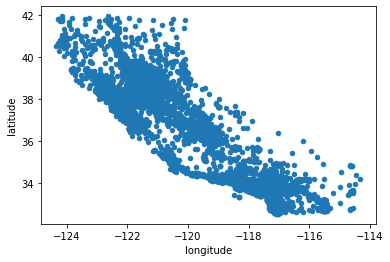

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the ```alpha``` option to ```0.1``` makes it much easier to visualize the places where there is high density of data points.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

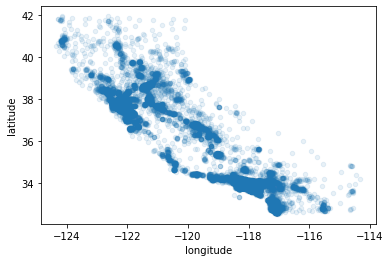

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now that's much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

Now let's look at the housing prices. The radius of each circle represents the district's population (option ```s```), and the color represents the price (option ```c```). We will use a predefined color map (option ```cmap```) callet ```jet```, which ranges from blue (low values) to red (high prices)

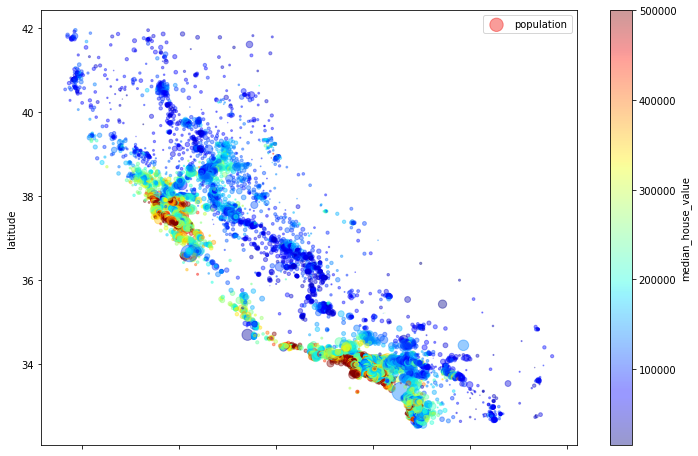

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', c='median_house_value',
            cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,8))
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

# Looking for Correlations

Since the dataset is not too large, you can easily compute the *standard correlation coefficient* (also called *Pearson's r*) between every pair of attributes using the ```corr()``` method:

In [18]:
corr_matrix = housing.corr()

Now let's look at how much each attribute correlates with the median house value:

In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to -1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

Another way to check for correlation between attributes is to use Pandas' ```scatter_matrix``` function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 11^2 = 121 plots, which would not fit on a page, so let's just focus on a few promising attributes that seem most correlated with the median housing value.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

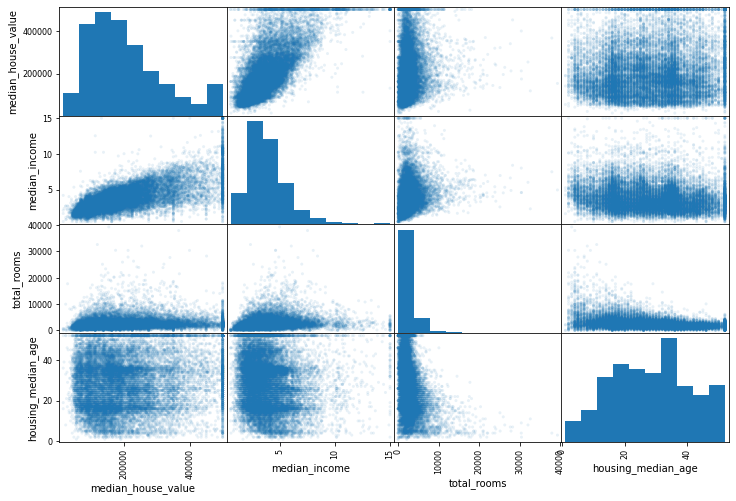

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.1)

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead, Pandas displays a histogram of each attribute (other options are available).

The most promising attribute to predict the median house value is the median income, so let's zoom in on their correlation scatterplot.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

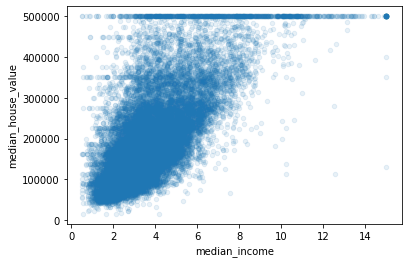

In [21]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

This plot reveals few things. First, the  correlation is indeed very strong; you can clearly see the upward trend and the points are not too disperse. Secon, the price cap that we noticed earlier is clearly visible as a horizontal line at USD500,000. But this plot reveals other less obvious straight lines: a horizontal line around USD450,000, another around USD350,000, perhaps one around USD280,000, and a few more below that. You may want to try removing the corresponding districts  to prevent your algorithms from learning to reproduce these data quirks

# Experimenting with Attribute Combinations.

Hopefully the previous sections gave and idea of a few ways the data can be explored to gain insights. There are few data quirks that we may want to clean up before feeding the data into a Machine Learning algorithm, and you found interesting correlations between attributes, in particular with the target atttribute. Also it was noticed that some attributes have a tail-heavy distribution, so you may want to transform them (e.g, by computing their logarithm). Of course, your mileage will vary considerably with each project.

One last thing you may  want to try to do before actually preparing the data, is to try various attributes combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself it is not very useful; you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

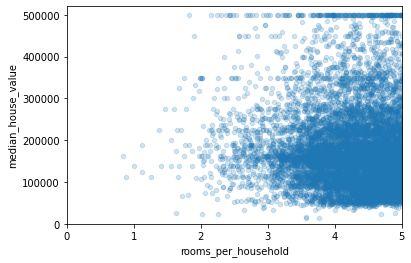

In [25]:
housing.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [26]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

* Note: before scaling the data is better to prevent information about the distribution of the test set leaking into the model, fit the scaler on the trainign data only, then standarize both training and test sets with that scaler. By fitting the scaler on the full dataset prior to splitting, information about the test set is used to transform the training set, which turn is passed downstream.

# Prepare the Data for Machine Learning Algorithms.

It's time to prepare the data for the Machine Learning Algorithm. Instead of doing this manually, we should write functions to do that, for several good reasons:

    - This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset)
    - You will gradually build a library of transformation functions that you can reuse in future projects.
    - You can use these functions in your live system to transform the new data before feeding it to your algorithms.
    - This will make it possible for you to easily try various transformations and see which combination of transformations  works best.
    
But first let's revert to a clean training set (by copying ```strat_train_set```), and let's separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target  values (note that ```drop()``` creates a copy of the data and does not affect ```strat_train_set```)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# Data Cleaning 

Most of Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. You noticed earlier that the ```total_bedrooms``` attribute has some missing values, so let's fix this. You have three options:

    - Get rid of the corresponding districts.
    - Get rid of the whole attribute.
    - Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame's ```dropna(), drop()``` and ```fillna()``` methods:

In [29]:
# housing.dropna(subset=['total_bedrooms']) # option 1
# housing.drop('total_bedrooms', axis=1) # option 2
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median) # option 3


In [30]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0,4.866192,NaN,2.468327


In [31]:
sample_incomplete_rows.dropna(subset=['total_bedrooms']) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [32]:
sample_incomplete_rows.drop('total_bedrooms', axis=1) # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4.0,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4.0,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2.0,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0,4.866192,NaN,2.468327


In [33]:
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True) # option 3

In [34]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4.0,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4.0,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2.0,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0,4.866192,NaN,2.468327


If you choose option 3, you should compute the median value on the training set, and use it to fill the missing values in the training set, but also don't forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values: ```Imputer```. Here is how to use it. First, you need to create ```Imputer``` instance, specifying that you want to replace each attribute's missing values with the median of that attribute:

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [36]:
housing_num = housing.drop('ocean_proximity', axis=1) # Imputer only works on numerical values.

In [37]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The ```imputer``` has simply computed the median of each attribute and stored the result in its ```statistics_``` instance variable. Only the ```total_bedrooms``` attribute had missing values, but we cannot be sure that there won't be any missing values in the new data after the system goes live, so it is safer to apply the ```imputer``` to all numerical attributes:

In [38]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        3.00000000e+00,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [39]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        3.00000000e+00,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

Now you can use this "trained" ```imputer``` to transform the training set by replacing missing values by the learned medians:

In [40]:
X = imputer.transform(housing_num)

The resultt is a plain Numpy array containing the transformed features. If you want tto put it back into a Pandas DataFrame:

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [42]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0,5.505618,0.193878,3.808989


# Handling Text and Categorical Attributes.

Earlier we left out the categorical attribute ```ocean_proximity``` because it is a text attribute so we cannot compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let's convert these text labels to numbers.

In [43]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [44]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

This is better: now we can use this numerical data in any ML algorithms. You can look at the mapping that this encodes has learned using the ```categories_``` attribute

In [45]:
print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H  OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and otherwise), and so on. This is called *one-hot encoding*, because only one attribute will be equal to 1 (hot), while the other will be 0 (cold).

Scikit-Learn provides a ```OneHotEncoder``` encoder to convert integer categorical values into one-hot vectors. Let's encode the  categories as one-hot vectors. Note that ```fit_transform()``` expects a 2D array, but ```housing_cat_encoded``` is a 1D array, so we need to reshape it

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy *sparse matrix*, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array, but if you really want to convert it to a dense NumPy array, just call the ```toarray()``` method:

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])


# Custom Transformers

Although Scikit-Learn provides  many useful transformers, you will need to write your  own for tasks such a custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: ```fit()``` (returning ```self```), ```transform()```, and ```fit_transform()```. You can get the last one for free by simply adding ```TransformerMixin``` as base class. Also, if you add ```BaseEstimator``` as base class (and avoid ```*args``` and ```**kwargs``` in your constructor) you will get two extra methods (```get_params()``` and ```set_params()```) that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room = True): # No *args or **kwargs
        self.add_bedroom_per_room = add_bedroom_per_room
        
    def fit(self, X, y=None):
        return self # Nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedroom_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedroom_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [49]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ['rooms_per_household', 'population_per_household'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0,4.625369,0.223852,2.094395,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0,6.00885,0.159057,2.707965,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0,4.225108,0.241291,2.025974,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0,5.232295,0.200866,4.135977,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0,4.50581,0.231341,3.047847,4.50581,3.047847


In this example the transformer has one hyperparameter, ```add_bedrooms_per_room```, set to ```True``` by default  (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any  data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

# Feature Scaling.

One of the most important transformations you need to apply to your data is *feature scaling*. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only ranges from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: *min-max scaling* and *standardization*

Min-max scaling (many  people call this *normalization*) is quite simple: values  are shifted and rescaled  so that they end up ranging from 0 to 1. We do this by substracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called ```MinMaxScaler``` for this. It has a ```feature_range``` hyperparameter that lets you change the range if you don't want to 0-1 for some reasons.

Stardadization is quite different: first it substract the mean value (so standardized values always have zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect and input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would the crush all the other values from 0-15 down to 0-0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called ```StandardScaler``` for standardization.

# Transformation Pipelines

As you can see, there are many data transformations steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the ```Pipeline``` class to help with such sequences of transformations. 


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

The ```Pipeline``` constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a ```fit_transform()``` method). The names can be anything you like.

When you call the pipeline's ```fit()``` method, it calls ```fit_transform()```, sequentially  on all transformers, passing the output of each cell as the parameter to the next call, until it reaches the final estimator, for which  it just calls the ```fit()``` method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator ```StandardScaler```, which is a transformer, so the pipeline has a ```transform()``` method that applies all the transforms to the data in sequence (it also has a ```fit_transform``` method that we could have used instead of calling ```fit()``` and then ```transform()```).

You now have a pipeline for numerical values, and you also need to apply the ```LabelBinarizer``` on tthe categorical values: how can you join these transformations into a single pipeline? Scikit-Learn provides a ```FeatureUnion``` class for this. You give a list of transformers (which can be entire transformer pipelines), and when its ```transform()``` method is called it runs each transformer's ```transform()``` method in parallel, waits for their output, and then concatenates them and returns the result (and of course  calling its ```fit()``` method calls all each transformer's ```fit()``` method). A full pipeline handling both numerical and categorical attributes may look like this:

* Note: This was changed to ```ColumnTransformer``` from the original text

In [52]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

In [53]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names  = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [55]:
# old alternative solution
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('num_pipeline', DataFrameSelector(cat_attribs)),
    ('label_binarizer', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [56]:
old_housing_prepared  = full_pipeline.fit_transform(housing)

In [57]:
old_housing_prepared.toarray() # Same result

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [58]:
print(housing_prepared.shape)
print(old_housing_prepared.shape)

(16512, 20)
(16512, 20)


# Select and Train a Model

At last! The problem is framed, we got the data, is explored, sampled, splitted into training and test set, and wrote transformations pipelines to clean up and prepare your data for Machine Learning algorithms automatically.

# Training and Evaluating on the Training Set

The good news is that thanks all the previous steps, things are now going to be much more simpler. Let's train a Linear Regression model.

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Done, now there is a working Linear Regression model. Let's try it out on few instances from the training  set:

In [60]:
some_data = housing.iloc[:5]

In [61]:
some_labels = housing_labels.iloc[:5]

In [62]:
some_data_prepared = full_pipeline.transform(some_data)

In [63]:
print(some_data)
print('------------')
print(some_labels)
print('------------')
print(some_data_prepared)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  income_cat  \
17606       710.0       339.0         2.7042       <1H OCEAN         2.0   
18632       306.0       113.0         6.4214       <1H OCEAN         5.0   
14650       936.0       462.0         2.8621      NEAR OCEAN         2.0   
3230       1460.0       353.0         1.8839          INLAND         2.0   
3555       4459.0      1463.0         3.0347       <1H OCEAN         3.0   

       rooms_per_household  bedrooms_per_room  population_per_househ

In [64]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [200860.48973484 325527.93559759 201882.47991703  54956.04539331
 188116.26928254]


In [65]:
print('Labels:\t\t', list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, although the predictions are not exactly accurate (e.g., the last 2 predictions are way off 50%). Let's measure this regression model's RMSE on the whole traing set using Scikit-Learn ```mean_squared_error``` function:

In [66]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67784.32202861732

Clearly not a great score, most districts' ```median_housing_values``` range between 120000 and 265000, so a typical prediction error of 67784 is not very satisfying. This is an example of a model underfitting the training data. When this happens  it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the contraints  on the model. This model is not regularized, so this rules out the last option. You could try to add more features (e.g.,  the log of the population), but first let's try a more complex model to see how it does.

Let's train a ```DecisionTreeRegressor```. This is a powerful model, capable of finding complex nonlinear relationships in the data.

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [68]:
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)

In [69]:
tree_mse

0.0

This model obviously is not perfect, it is much more likely that the model badly overfit the data. As we saw earlier, you don't want to touch the test set until you are ready to launch a  model you are confident about, so you need to use part of the training set for training, and part for model validation.

# Better Evaluation Using Cross-Validation.

One way to evaluate the Decision Tree model would be to use the ```train_test_split``` function to split the training set into smaller training set and validation set, then train your models against the smaller training set and evaluate them against the validation set. It's a bit of work, but nothing too difficult and it would work fairly well. 

A great alternative is to use Scikit-Learn's *cross-validation* feature. The following code performs *K-fold cross-validation*: it  randomly splits the training set into 10 distinct subsets called *folds*, then i trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

* Note: Scikit-Learn cross-validation feature expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes ```-scores``` before calculating the square root.

In [71]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [72]:
display_scores(rmse_scores)

Scores: [70824.64133946 66592.6253146  70833.21079107 69851.22259775
 69618.47024285 74569.56073961 72176.84998877 70795.78521982
 77086.04466004 70244.17527762]
Mean: 71259.2586171589
Standard deviation: 2716.971451135835


Now the Decision Tree doesn't look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model. Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also measure how precise this estimate is (i.e., its standard deviation). The  Decision Tree has a score approximately 71000. You would not have this information if you just used one validation set. But cross-validation comes at the cost training the model several times, so it is not always possible.

Let's compute the same scores for the Linear Regression model just to be sure:

In [73]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66140.5574445  66402.64250448 67315.60188962 73931.43329691
 67666.27878335 70758.72248018 63820.26082748 67347.4533752
 70423.45351656 67291.28882149]
Mean: 68109.769293978
Standard deviation: 2711.68289145883


That's right the Decision Tree is overfitting so badly that it performs worse than the Linear Regression model.

Let's try one last model now: the ```RandomForestRegressor```. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called *Ensemble Learning*, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models.

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [78]:
housing_predictions_forest_reg = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housing_predictions_forest_reg)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [79]:
forest_reg_rmse

18696.87417251781

In [80]:
display_scores(forest_rmse_scores)

Scores: [49519.85097433 47606.90248798 49947.23499172 52275.1656831
 49829.79809761 53330.83664344 49064.24248944 47780.38712468
 52759.77579972 49948.21118064]
Mean: 50206.240547265144
Standard deviation: 1877.6602355434793


This is much better: Random  Forests look very promising. However, note that  the score on the training set is still much lower than on validation sets, meaning the model is still overfitting the training set. Possible solutions for overfitting are to simplify the  model, constrain it (i.e., regularize it), or get a lot more training data. However, before you dive much deeper in Random Forests, you should try out many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different, kernels, possible a neural network, etc.), withou spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

*Note: You should save every model you experiment with, so you can come back easily to any model you want. Make sure you save both hyperparameters and the trained parameters. as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare the types of errors  they make. You can easily save Scikit-Learn model by using Python's ```pickle``` module, or using ```sklearn.externals.joblib```, which is more efficient at serializing large NumPy arrays:

In [85]:
import joblib
joblib.dump(forest_reg, 'my_forest_reg.pkl')

['my_forest_reg.pkl']

In [86]:
# To load
#joblib.load('my_forest_reg.pkl')

# Fine-Tune the Model

Let's assume that you now have a shortlist of promising models. You now need to fine-tune them. Let's look at few ways you can do that.

# Grid search

One way to do that would be to fiddle with the hyperparameters manually until you find a great combination of hyperparameters values. This would be very tedious work, and you may not have time to explore many combinations.

Instead you should get ```GridSearchCV``` to search for  you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the following code searches for the best combination of hyperparameters values for the ```RandomForestRegressor```

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]}
]

In [88]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

*Note: When you have no idea what value of hyperparameters should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the ```n_estimators``` hyperparameters).

This ```param_grid``` tells Scikit-Learn to first evaluate all 3x4 = 12 combinations of ```n_estimators``` and ```max_features``` hyperparameter values specified in the first ```dict```, then try all 2 x 3 = 6 combinations of hyperparameter values in the second ```dict```, but this time with the ```bootstrap``` hyperparameter set to ```False``` instead of ```True``` (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of ```RandomForestRegressor``` hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 x 5 = 90 rounds of training. It may take quite long time, but when it is done you can get the best combination of parameters like this:

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

*Note: Since 30 is the maximun value of ```n_estimators``` that was evaluated, you should probably evaluate higher values as well, since the score may continue to improve.

You can also get the best estimator directly:

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

* Note: If ```GridSearchCV``` is initialized with ```refit=True``` (which is the default), then once it finds the best estimator using cross validation, it retains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance* 

And of course the evaluation scores are also available:

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64106.72065340125 {'max_features': 2, 'n_estimators': 3}
56826.00123479706 {'max_features': 2, 'n_estimators': 10}
54874.83556511972 {'max_features': 2, 'n_estimators': 30}
62159.07915486217 {'max_features': 4, 'n_estimators': 3}
54925.46368892163 {'max_features': 4, 'n_estimators': 10}
52435.118561739204 {'max_features': 4, 'n_estimators': 30}
61884.403177511645 {'max_features': 6, 'n_estimators': 3}
53700.014456510544 {'max_features': 6, 'n_estimators': 10}
52051.390034610326 {'max_features': 6, 'n_estimators': 30}
61160.31453964781 {'max_features': 8, 'n_estimators': 3}
53376.08236431807 {'max_features': 8, 'n_estimators': 10}
51711.10349455107 {'max_features': 8, 'n_estimators': 30}
64176.54332427717 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56242.365279885205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62807.51207822315 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
55069.6761305029 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In this example, we obtain the best solution by setting the ```max_features``` hyperparameter to 6 and the ```n_estimators``` hyperparameter to 30. The RMSE score for this combination is 52051, which is highly better than the score you got earlier using the default hyperparameter which as 71259.

*Note: Don't forget that you can treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether  or not to add a feature you were not sure about (e.g., using the ```add_bedrooms_per_room``` hyperparameter of your ```CombinedAttributesAdder``` transformer). It may similarly be used automatically to find the best way to handle outliers, missing features, feature selection, and more.

# Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter *search space* is large, it is often preferable to use ```RandomizedSearchCV``` instead. This class can be used in much the same way as the ```GridSearchCV``` class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
    
    - If you lef randomized search run, for, say, 1000 iterations, this approach will explore 1000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
    - You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.
    
# Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or "ensemble") will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# Analyze the Best Models and Their Errors

You will often gain good insights on the problem by inspecting  the best models. For example, the ```RandomForestRegressor``` can indicate the relative importance of each attribute for making accurate predictions:

In [92]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [93]:
feature_importances

array([5.54474507e-02, 5.22395602e-02, 4.30221930e-02, 1.38390043e-02,
       1.36453902e-02, 1.45501091e-02, 1.33975257e-02, 2.71490913e-01,
       1.39271857e-01, 2.83141050e-02, 3.65314786e-02, 5.09241128e-02,
       1.90103739e-02, 7.67672923e-02, 2.37412736e-02, 7.71525249e-03,
       1.34712467e-01, 5.41198499e-05, 1.73729824e-03, 3.58822330e-03])

Let's display these importances scores next to their corresponding attribute names:

In [94]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

In [96]:
cat_one_hot_attribs = list(encoder.categories_)

In [97]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [98]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2714909126450003, 'median_income'),
 (0.13927185671250375, 'income_cat'),
 (0.0767672922576473, 'pop_per_hhold'),
 (0.05544745072923212, 'longitude'),
 (0.052239560238187675, 'latitude'),
 (0.050924112750794906, 'population_per_household'),
 (0.04302219302171867, 'housing_median_age'),
 (0.036531478592141446, 'bedrooms_per_room'),
 (0.0283141050308789, 'rooms_per_household'),
 (0.0237412735670279, 'bedrooms_per_room'),
 (0.019010373888007068, 'rooms_per_hhold'),
 (0.01455010906663077, 'population'),
 (0.013839004273849938, 'total_rooms'),
 (0.013645390184738563, 'total_bedrooms'),
 (0.013397525739964177, 'households'),
 (0.007715252489623687,
  array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object))]

With this information, you may want  to try dropping some of the less useful features (e.g., apparently only one some of the ```ocean_proximity``` category are really useful, so we could try dropping the others).

You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.)

# Evaluate your system on the test set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is time to evualuate the final model on the test set. There is nothing special about this processl jest get the predictors and the labels from your test set, run your ```full_pipeline``` to transform the data (call ```transform()```), *not ```fit_transform()```), and evaluate the final model on the test set:


In [102]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [103]:
final_predictions = final_model.predict(X_test_prepared)

In [104]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [105]:
final_rmse

49403.00064111011

The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform well on unknown datasets). It is not the case in this example, but when this happens you must resist the temptation to tweak hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.